<a href="https://colab.research.google.com/github/garvjain7/Chatbot/blob/main/VAC_4th_sem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
df = pd.read_csv('salary_prediction_dataset.csv')
df

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082
...,...,...
995,2.740059,7100.184410
996,18.428958,89085.944214
997,3.599554,17812.585952
998,19.054510,93126.037490


YearsExperience    0
Salary             0
dtype: int64


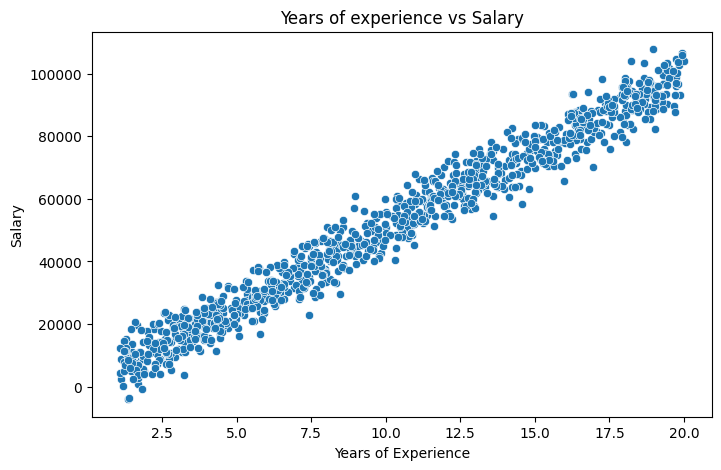

In [24]:
print(df.isnull().sum())

# plot data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of experience vs Salary')
plt.show()

In [25]:
# Splitting the data into feature(x) and target variable(y)
x=df[['YearsExperience']] # independent variable
y=df['Salary'] # dependent variable

# Splitting into training(80%) and testing(20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

# Checking data split sizes
x_train.shape, x_test.shape

((800, 1), (200, 1))

In [40]:
# creating and training the simple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercept(Predicted Salary when year of experience is 0): {model.intercept_}")
print(f"Coefficient(amount of salary increased per year on basis of experience): {model.coef_[0]}")

Intercept(Predicted Salary when year of experience is 0): 1030.0980075414627
Coefficient(amount of salary increased per year on basis of experience): 4945.1982976339905


In [30]:
y_pred = model.predict(x_test)

results = pd.DataFrame({'Actual Salary': y_test.values, 'Predicted Salary': y_pred})
results.head()

,Actual Salary,Predicted Salary
0,10777.272533,14849.040511
1,80513.256904,81487.334249
2,104586.317923,98667.053355
3,21847.192143,16315.639512
4,46754.819781,50010.072675


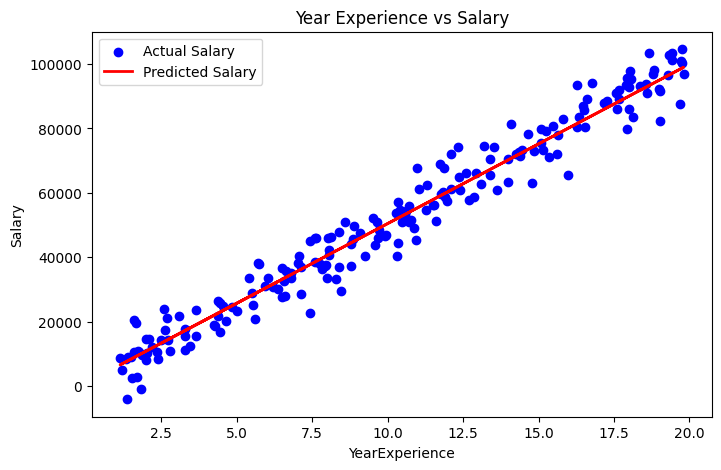

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual Salary')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.title('Year Experience vs Salary')
plt.legend()
plt.show()

In [32]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 4203.668188151237
Mean Squared Error: 29326947.342973694
R-squared: 0.9635317044940318


In [50]:
# Predict salary based on user input
# experience = float(input("Enter years of experience: "))
# if 0 <= experience <= 40:
#   predicted_salary = model.predict([[experience]])[0] # this 0 in index values defines that it takes the first value of the array of predicted salary
#   print(f"Predicted salary for {experience} years of experience: ${predicted_salary:,.2f}") # we can also write [0] here after predicted salary and remove from previous line. it worked the same.
# else:
#   print("Enter a valid range of experience (0-40 years)")

while True:
    try:
        experience = float(input("Enter years of experience (0-30): "))

        if 0 <= experience <= 40:
            predicted_salary = model.predict([[experience]])[0]
            print(f"Predicted salary for {experience} years of experience: ${predicted_salary:,.2f}")
            break  # Exit loop if input is valid
        else:
            print("❌ Error: Experience should be between 0 and 40 years. Please try again.")

    except ValueError:
        print("❌ Invalid input! Please enter a numeric value.")

Enter years of experience (0-30): 45
❌ Error: Experience should be between 0 and 40 years. Please try again.
Enter years of experience (0-30): 64
❌ Error: Experience should be between 0 and 40 years. Please try again.
Enter years of experience (0-30): 24
Predicted salary for 24.0 years of experience: $119,714.86


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
